##Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**The water_potability.csv file contains water quality metrics for 3276 different water bodies.**

Our objective is -

1. Predict if water is safe for human consumption
2. EDA of water data

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
dataset = pd.read_csv("water_potability.csv")
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploratory Data Analysis

Let's take a look at the basic statistics of the dataset

In [ ]:
dataset.shape

(3276, 10)

In [ ]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Basic statistics clearly shows that Columns have different range. Columns like "pH", "Hardness", "Chloramines" etc has small range compared to columns like "Solids", "Sulfate". So we need to standarised the data.

Now lets check if there is any missing value in the dataset.

In [ ]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Columns "pH", "Sulfate" and "Trihalomethanes" all these have some missing value. The number of missing value is high in all three columns so let try to impute them by median of the rest of the variables.

In [ ]:
dataset['ph'].fillna(dataset['ph'].mean(), inplace = True)
dataset['Sulfate'].fillna(dataset['Sulfate'].median(), inplace = True)
dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].mean(), inplace = True)
dataset.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Now lets check the count of probability in both categories

Potable :  60.99 %
Not Potable :  39.01 %


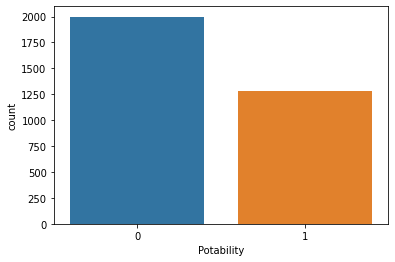

In [ ]:
print("Potable : ", round(dataset.Potability.value_counts()[0]/len(dataset)*100,2), "%")
print("Not Potable : ", round(dataset.Potability.value_counts()[1]/len(dataset)*100,2), "%")
sns.countplot(x= 'Potability', data = dataset)

([<matplotlib.patches.Wedge at 0x7f459ddc3410>,
 [Text(-0.3722543665175176, 1.0350974285586076, 'Potable'),
  Text(0.3722543665175174, -1.0350974285586076, 'Not Potable')])

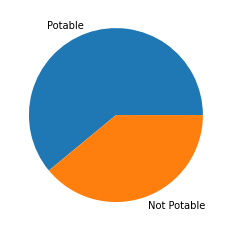

In [ ]:
plt.pie(dataset.Potability.value_counts(), labels= ["Potable", "Not Potable"])

Two class are distributed as 60% and 40%. Since they are fairly closed so we will not perform any resampling method.

Lets look at the distribution of all independent columns in the dataset. First look at the boxplot

In [ ]:
cols =['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

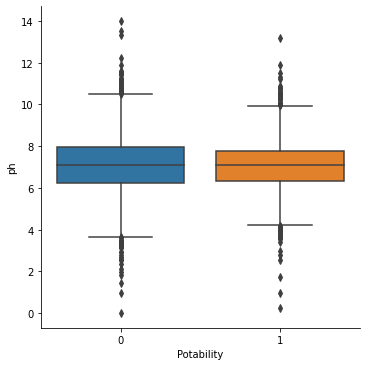

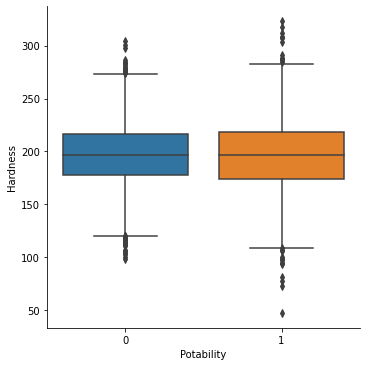

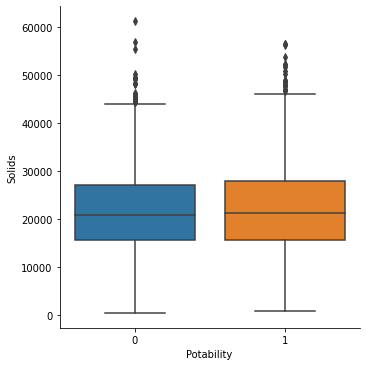

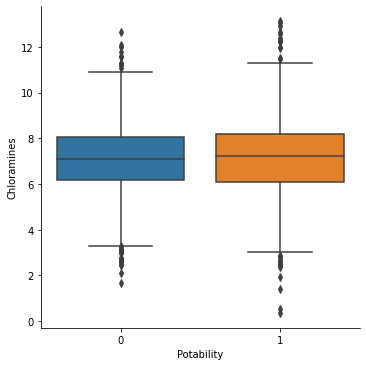

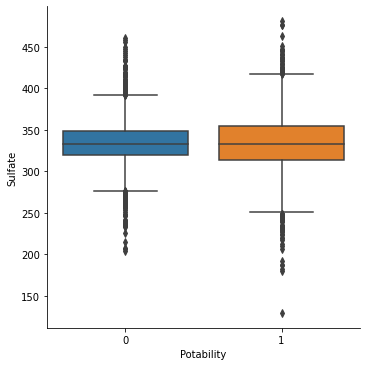

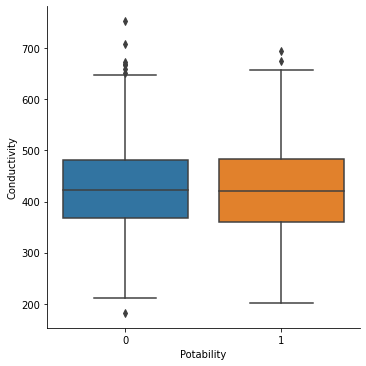

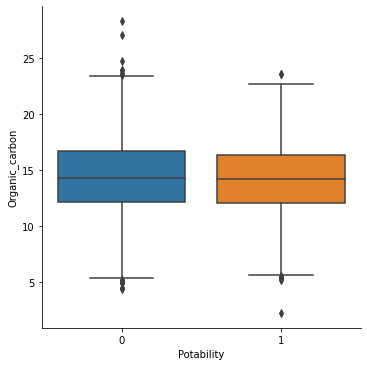

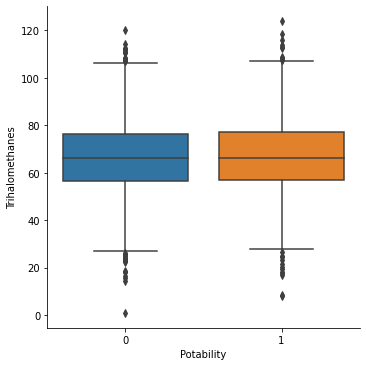

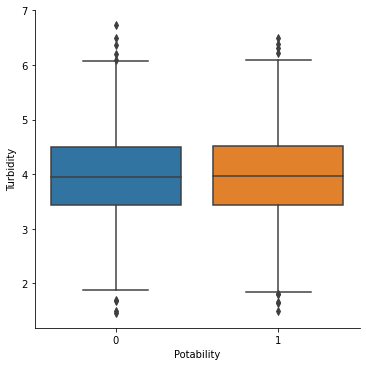

In [ ]:
for var in cols:
  #print("################# ",var, " ##################")
  sns.catplot(x = "Potability", y= var, data= dataset, kind= "box")

Every variable has some outlier.

Now Check the correlation among the variables

Text(0.5, 1.0, 'Correlation plot')

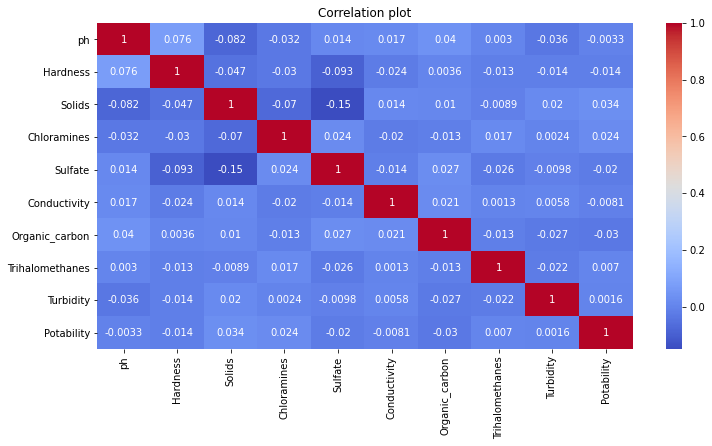

In [ ]:
plt.figure(figsize= (12,6))
sns.heatmap(dataset.corr(), cmap= 'coolwarm', annot= True)
plt.title("Correlation plot")

It's seems that the variables are not highly correlated to each other. 

Now see the distribution of some variables.

<Figure size 1080x1080 with 0 Axes>

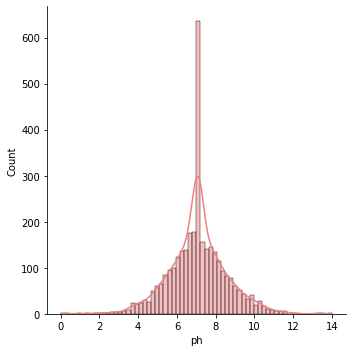

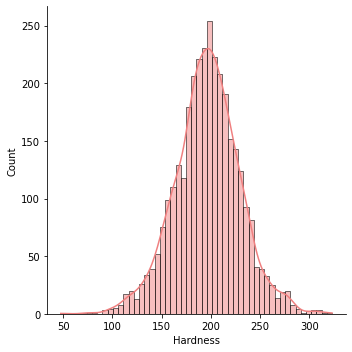

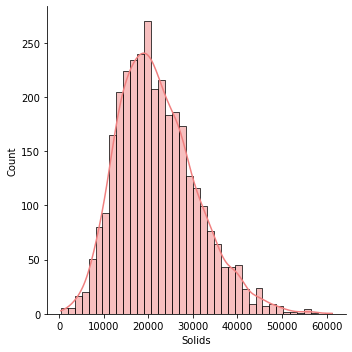

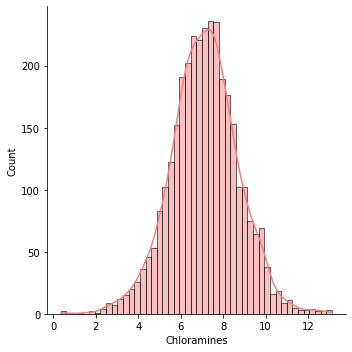

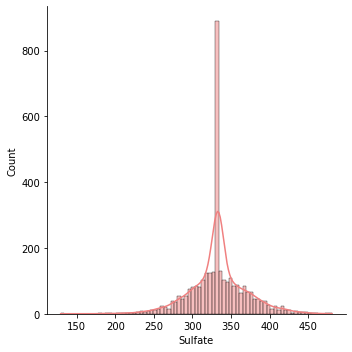

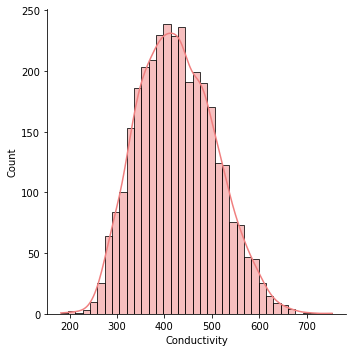

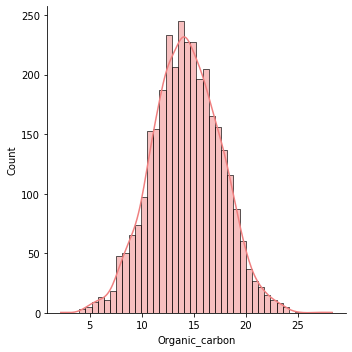

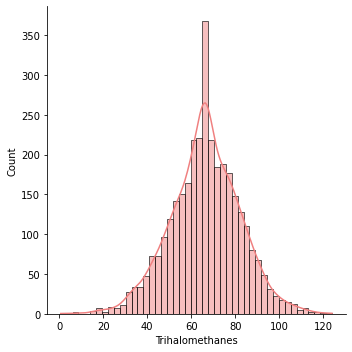

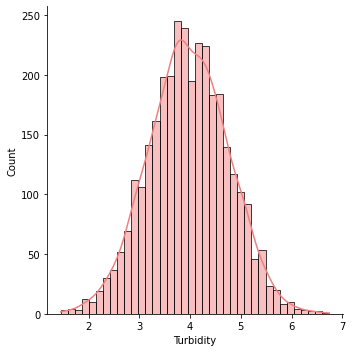

In [ ]:
fig = plt.figure(figsize= (15,15))
for i in range(0,9):
  sns.displot(dataset.iloc[:,i], color= 'lightcoral', kde = True)
  fig.tight_layout(pad = 3.0)

All The variables are bell shaped more of less.

Lets look at the pair plot of the variables

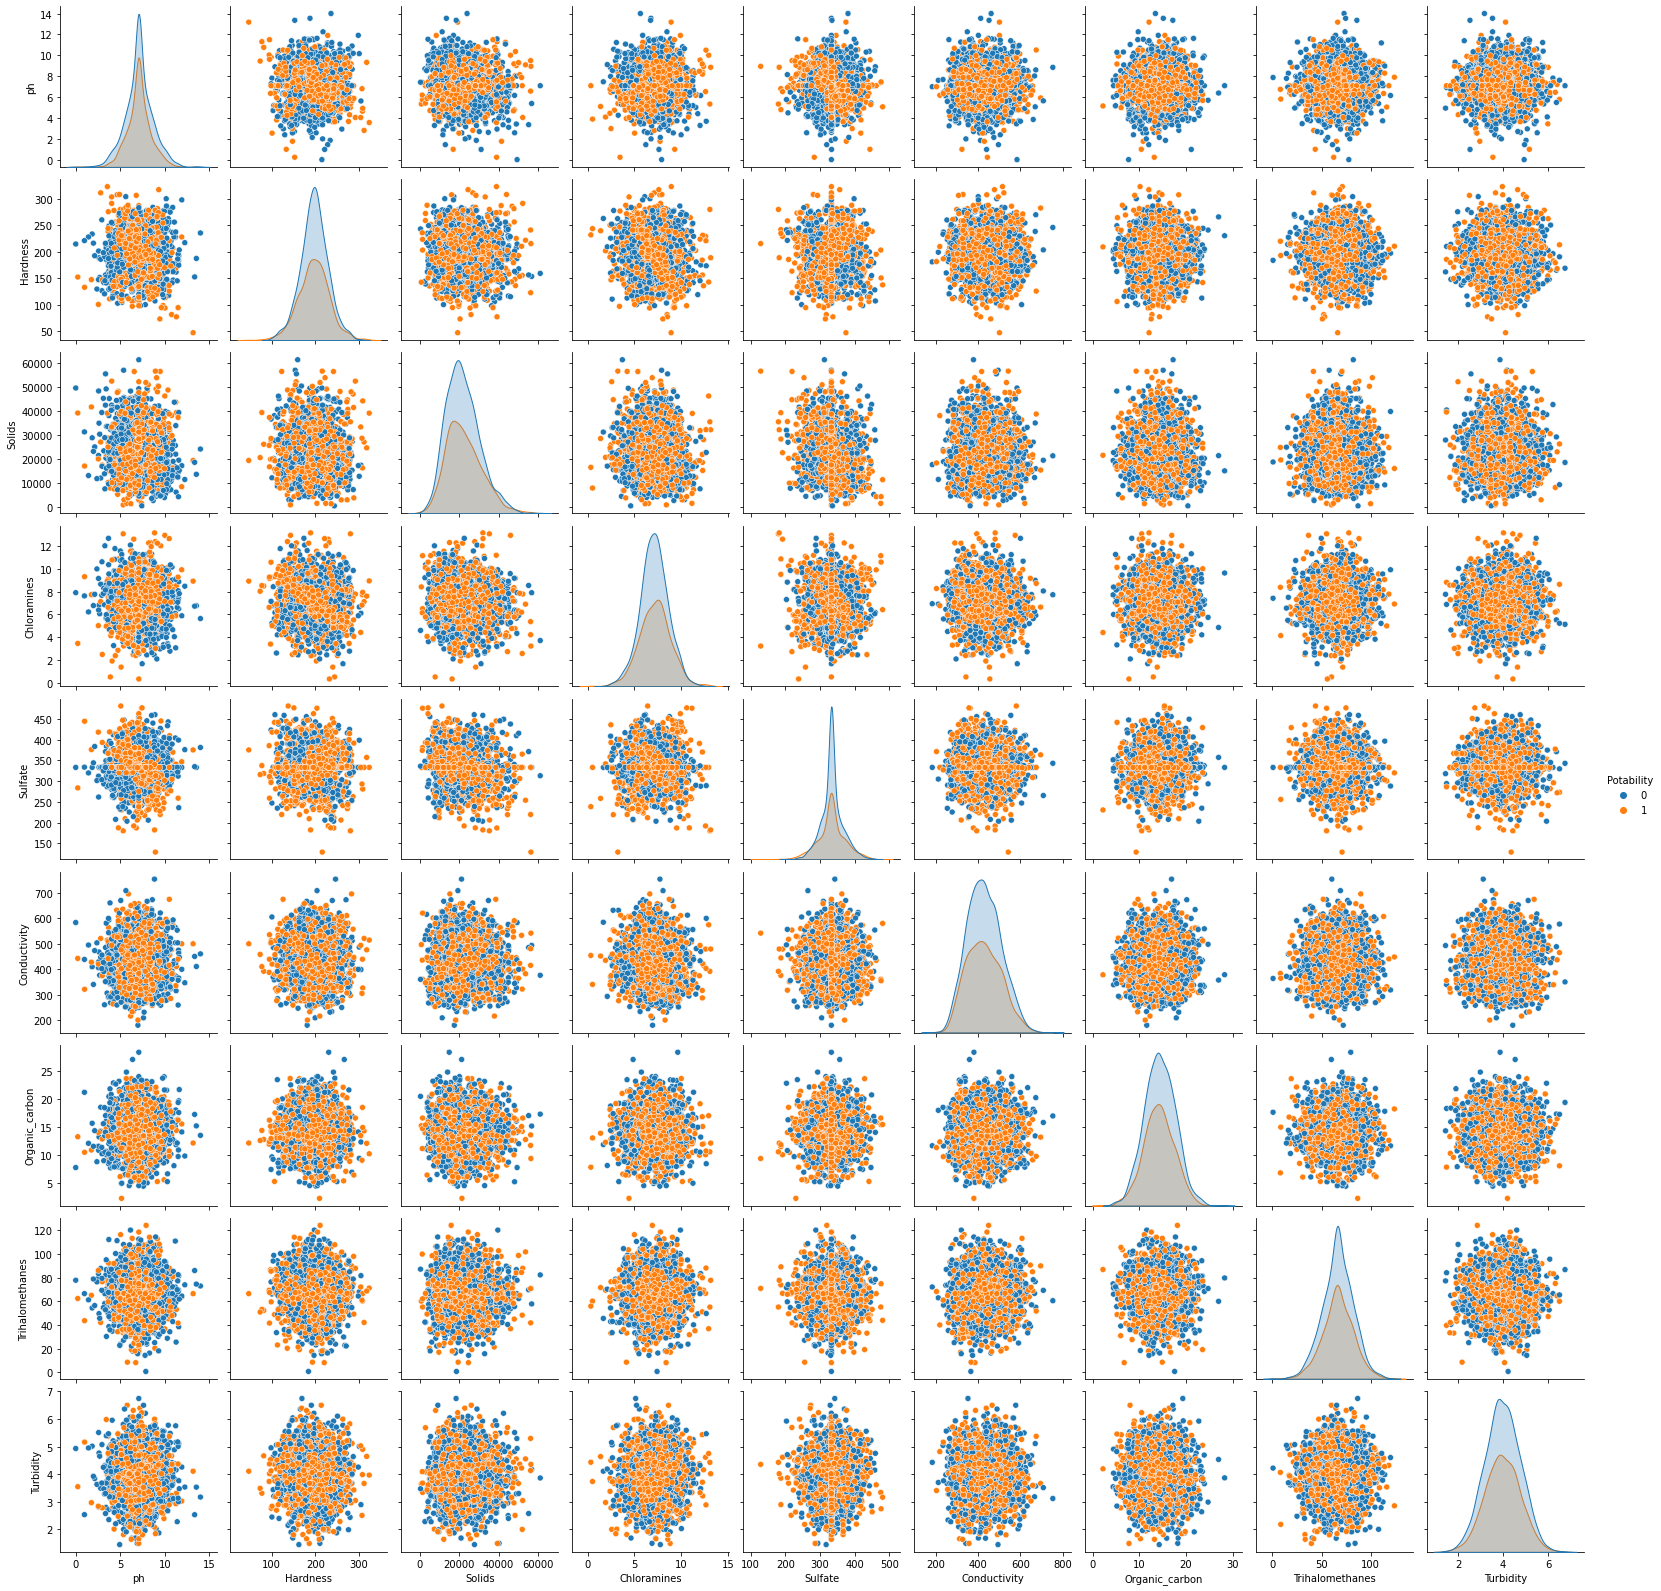

In [ ]:
sns.pairplot(dataset, hue= 'Potability', )
plt.title("Pair plot of the dataset")

Pairplot also shows that there are very less correlation among the variables. Also the Potable and non Potable water are spread equaly.

## Classification Model

Lets try to fit a classification model on the data. But before that lets divide the dataset into train and test set

In [ ]:
# Train test partition
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[cols], dataset['Potability'],test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(2293, 9)
(983, 9)


### 1. Logistic Regression

First fit Logistic Regression with out scaling the variables.

Apply k-fold cross validation on the dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix 

# Preparing Crossvalidation procedure
cv = KFold(n_splits= 10, random_state = 1, shuffle= True)

# Creating model
model= LogisticRegression()

# Evaluating mode;
scores = cross_val_score(model, X_train, y_train, scoring = "accuracy", cv = cv, n_jobs = -1)

print("Accuracy on train set : %.3f (%.3f)" % (scores.mean(), scores.std()))

Accuracy on train set : 0.602 (0.029)


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("Accuracy of logistic Regression classifier on Train : {:.2f}".format(model.score(X_train,y_train)))
conf = confusion_matrix(y_train, y_pred)
print("The confussion matrix is of Train set :\n", conf)
print("Accuracy of logistic Regression classifier on Test : {:.2f}".format(model.score(X_test,y_test)))
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print("The confussion matrix is of test set :\n", conf)

Accuracy of logistic Regression classifier on Train : 0.60
The confussion matrix is of Train set :
 [[1381    0]
 [ 912    0]]
Accuracy of logistic Regression classifier on Test : 0.63
The confussion matrix is of test set :
 [[617   0]
 [366   0]]


Logistic Regression is not performing well on the dataset

### 2. Support Vector Machine

Lets fit SVM on the dataset. 

In [ ]:
from sklearn import svm

model = svm.SVC(kernel= "linear", C= 1, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv = 5)

print("Accuracy on train set : %.3f (%.3f)" % (scores.mean(), scores.std()))

Accuracy on train set : 0.600 (0.006)


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("Accuracy of SVM classifier on Train : {:.2f}".format(model.score(X_train,y_train)))
conf = confusion_matrix(y_train, y_pred)
print("The confussion matrix is of Train set :\n", conf)
print("Accuracy of SVM classifier on Test : {:.2f}".format(model.score(X_test,y_test)))
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print("The confussion matrix is of test set :\n", conf)

Accuracy of SVM classifier on Train : 0.60
The confussion matrix is of Train set :
 [[1344   37]
 [ 887   25]]
Accuracy of SVM classifier on Test : 0.62
The confussion matrix is of test set :
 [[602  15]
 [357   9]]


SVm Performs batter than Logistic regression.

### KNN

Lets fit KNN on the dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix 

model = KNeighborsClassifier(n_neighbors= 2)
scores = cross_val_score(model, X_train, y_train, cv = 5)

print("Accuracy on train set : %.3f (%.3f)" % (scores.mean(), scores.std()))

Accuracy on train set : 0.572 (0.006)


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("Accuracy of KNN classifier on Train : {:.2f}".format(model.score(X_train,y_train)))
conf = confusion_matrix(y_train, y_pred)
print("The confussion matrix is of Train set :\n", conf)
print("Accuracy of KNN classifier on Test : {:.2f}".format(model.score(X_test,y_test)))
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print("The confussion matrix is of test set :\n", conf)

Accuracy of KNN classifier on Train : 0.75
The confussion matrix is of Train set :
 [[1381    0]
 [ 573  339]]
Accuracy of KNN classifier on Test : 0.60
The confussion matrix is of test set :
 [[535  82]
 [311  55]]


KNN Classifier is not performing batter than SVM.

### Random Forest

Now Try with Random forest classifier

Max : ( 0.6948118006103764 , 63 )


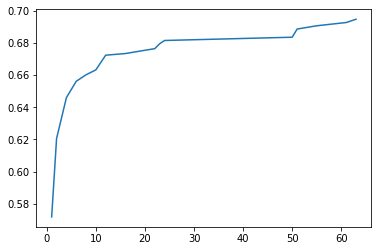

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

accuracy = []
n_estimators = []
max_acc = 0
max_i = 0

for i in range(1,100):
  model = RandomForestClassifier(random_state=42, n_estimators=i)
  model.fit(X_train, y_train)
  ac = accuracy_score(y_test, model.predict(X_test))
  if ac > max_acc:
    max_acc = ac
    max_i = i
    accuracy.append(ac)
    n_estimators.append(i)
  
plt.plot(n_estimators, accuracy)
print("Max : (", max_acc,",", max_i,")")

In [ ]:
y_pred = model.predict(X_test)
print("F1 Score of the model is : ", round(f1_score(y_pred, y_test), 2))

F1 Score of the model is :  0.46


Random forest perfoems batter than any other classifier in the. It achives 69.5% accuracy in the test set. But F1 score is low 46%

The reason that the classifier is not able to achive high accuracy is may be the imbalance in the groups in the dataset. So let's try all this classifier after balancing the dataset.

## Balancing the dataset

Let's use undersampling first

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

After resampling :( 1381 , 1381 )


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Now fit random forest on balanced data

Max : ( 0.6531027466937945 , 52 )


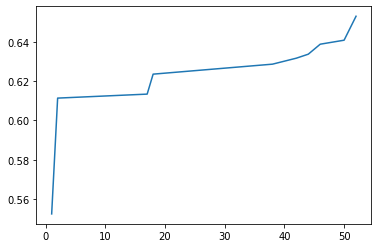

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

accuracy = []
n_estimators = []
max_acc = 0
max_i = 0

for i in range(1,100):
  model = RandomForestClassifier(random_state=42, n_estimators=i)
  model.fit(X_train_sm, y_train_sm)
  ac = accuracy_score(y_test, model.predict(X_test))
  if ac > max_acc:
    max_acc = ac
    max_i = i
    accuracy.append(ac)
    n_estimators.append(i)
  
plt.plot(n_estimators, accuracy)
print("Max : (", max_acc,",", max_i,")")

In [ ]:
y_pred = model.predict(X_test)
print("F1 Score of the model is : ", round(f1_score(y_pred, y_test), 2))

F1 Score of the model is :  0.52
